# Part I - Loan Data from Prosper

By

<a href="https://github.com/Obed-Makori">Makori Obed</a>

## Introduction


The Prosper Loan Data contains 113,937 loans with 81 variables including loan amount, interest rate, current loan status, borrower income, and many more. This data was pulled from Prosper.com, a peer-to-peer lending platform, in 2009. 

The Prosper Loan Data is a great resource for anyone interested in peer-to-peer lending or looking to study the effects of different loan characteristics on loan performance. The data can be used to build models that predict loan default or loss, and can also be used to study the effects of different loan features on borrower behavior.

## Data Understanding

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loading variables description file
Variable_definition=pd.read_csv("Variable Definitions.csv")
Variable_definition

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.
5,LoanStatus,"The current status of the loan: Cancelled, Ch..."
6,ClosedDate,"Closed date is applicable for Cancelled, Compl..."
7,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) fo...
8,BorrowerRate,The Borrower's interest rate for this loan.
9,LenderYield,The Lender yield on the loan. Lender yield is ...


In [3]:
#loading the dataset
data=pd.read_csv("prosperLoanData.csv")

data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
data.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [6]:
# filter out loans without ProsperScores
filtered_data= data[data['ProsperScore'].isnull()==False]

#test
filtered_data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
10,0F123545674891886D9F106,587746,2012-05-10 07:04:01.577000000,NaN,60,Current,NaN,0.27462,0.2489,0.2389,...,-214.04,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,19
12,0F1A3597143888805163EF7,1081604,2013-12-15 20:01:10.757000000,NaN,36,Past Due (1-15 days),NaN,0.17969,0.1435,0.1335,...,-3.40,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1


### What is the structure of your dataset?

> The Prosper Loan Data contains 113,937 loans with 81 variables including loan amount, interest rate, current loan status, borrower income, and many more. This data was pulled from Prosper.com, a peer-to-peer lending platform, in 2009.

### What is/are the main feature(s) of interest in your dataset?

> There are many features of interest in the Prosper Loan Data, but some of the most important are loan amount, interest rate, and current loan status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that will help support my investigation into my feature of interest are the loan status, the credit grade, the monthly loan payment, monthlyAPR, and the stated monthly income.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [7]:
for column in filtered_data.columns:
    print(column)

ListingKey
ListingNumber
ListingCreationDate
CreditGrade
Term
LoanStatus
ClosedDate
BorrowerAPR
BorrowerRate
LenderYield
EstimatedEffectiveYield
EstimatedLoss
EstimatedReturn
ProsperRating (numeric)
ProsperRating (Alpha)
ProsperScore
ListingCategory (numeric)
BorrowerState
Occupation
EmploymentStatus
EmploymentStatusDuration
IsBorrowerHomeowner
CurrentlyInGroup
GroupKey
DateCreditPulled
CreditScoreRangeLower
CreditScoreRangeUpper
FirstRecordedCreditLine
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
OpenRevolvingAccounts
OpenRevolvingMonthlyPayment
InquiriesLast6Months
TotalInquiries
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent (percentage)
TradesOpenedLast6Months
DebtToIncomeRatio
IncomeRange
IncomeVerifiable
StatedMonthlyIncome
LoanKey
TotalProsperLoans
TotalProsperPaymentsBilled
OnTimeProsperPayments
P

### Analysis of BorrowerAPR Feature

In [8]:
filtered_data.BorrowerAPR.value_counts().head()

0.35797    3672
0.35643    1644
0.30532     902
0.29510     747
0.35356     721
Name: BorrowerAPR, dtype: int64

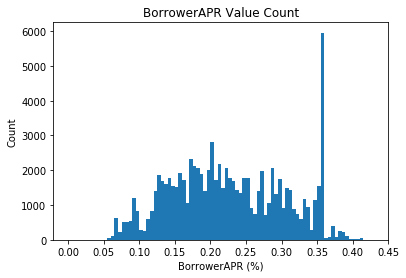

In [9]:
# create an array of bins for the histogram
bins = np.arange(0, filtered_data['BorrowerAPR'].max(), 0.005)

# plot the histogram
plt.hist(data = filtered_data, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR Value Count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('Count')
plt.xticks(np.arange(0, filtered_data['BorrowerAPR'].max()+0.05, 0.05));

### Analysis of ProsperScore Feature

<p>The Prosper Score feature is a risk score that is assigned to each loan listing on the Prosper website. The score is based on a number of factors, including the credit score of the borrower, the length of the loan, the amount of the loan, and the borrower's payment history. The Prosper Score is intended to be a measure of the risk of the loan, and it is used by Prosper to determine the interest rate that will be charged on the loan.</p>

In [10]:
filtered_data['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

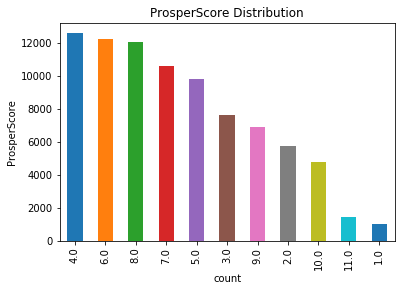

In [11]:
# create a bar plot of the distribution of ProsperScore
filtered_data['ProsperScore'].value_counts().plot(kind='bar')

# add a title and labels
plt.title('ProsperScore Distribution')
plt.xlabel('count')
plt.ylabel('ProsperScore')
plt.fontsize = 12

# set the size of the figure
plt.figsize=(12,12);

OBSERVATION: The number of borrowers increases as the score decreases.

### Distribution of Occupation

In [12]:
filtered_data['Occupation'].value_counts()

Other                                 21317
Professional                          10542
Executive                              3468
Computer Programmer                    3236
Teacher                                2888
Analyst                                2735
Administrative Assistant               2708
Accountant/CPA                         2574
Sales - Commission                     2350
Skilled Labor                          2180
Nurse (RN)                             2159
Clerical                               2116
Sales - Retail                         2029
Retail Management                      2001
Truck Driver                           1366
Construction                           1326
Police Officer/Correction Officer      1277
Laborer                                1217
Civil Service                          1139
Engineer - Mechanical                  1135
Food Service Management                1005
Engineer - Electrical                   900
Medical Technician              

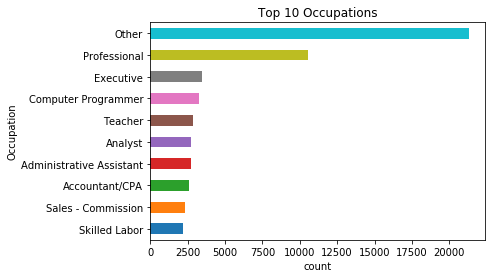

In [13]:
# The following code plots a horizontal bar graph of the top 10 occupations of borrowers
# The x-axis is the count of how many borrowers have that occupation
# The y-axis is the occupation
filtered_data['Occupation'].value_counts()[9::-1].plot(kind='barh')

# The title, x-label, and y-label are set
plt.title('Top 10 Occupations')
plt.xlabel('count')
plt.ylabel('Occupation')

# The fontsize is increased for readability
plt.fontsize = 12

# The figure size is increased to make the graph bigger
plt.figsize=(12,12)

Observation: It is clear that most borrowers are not included in the known occupations. For known ocupations, most borrowers tend to be professional borrowers.

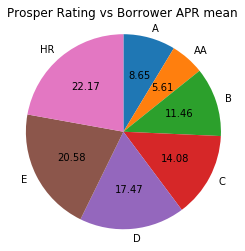

In [14]:
#This code calculates the mean of BorrowerAPR for each ProsperRating.
#Then, it plots a pie chart showing the results.
ProsperRating_mean = filtered_data.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()
ProsperRating_mean

plt.pie(ProsperRating_mean, labels = ProsperRating_mean.index, startangle = 90,
    counterclock = False, autopct='%1.2f')
plt.axis('square') 
plt.title('Prosper Rating vs Borrower APR mean');

Observation: Borrowers' ratings are presented in order of highest to lowest according to ProsperRating vs. BorrowerAPR (AA, A, B, C, D, E, HR). The highest grade of AA earned the lowest APR (5.61), whilst the lowest rating received the greatest APR, as can be seen from the pattern (22.17). This demonstrates the idea that, as was previously noted, borrowers with higher ratings earned reduced APR.

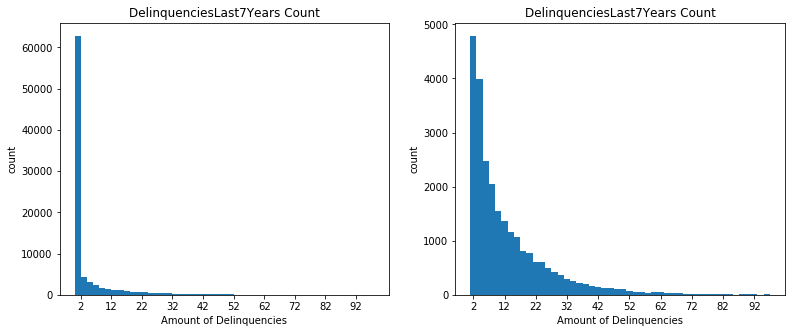

In [15]:
# The following code displays a histogram of the 'DelinquenciesLast7Years' column from the filtered_data DataFrame.
# Two subplots are displayed side-by-side.
# The first subplot shows the counts for all values of 'DelinquenciesLast7Years' including 0.
# The second subplot only shows the counts for values of 'DelinquenciesLast7Years' greater than 0.

# Create figure with two subplots
plt.figure(figsize = [13, 5]) 

# First subplot
plt.subplot(1, 2, 1)

# Create bins
bins = np.arange(0, filtered_data['DelinquenciesLast7Years'].max(), 2)

# Plot histogram
plt.hist(data = filtered_data, x = 'DelinquenciesLast7Years', bins = bins)

# Format x-axis ticks
plt.xticks(np.arange(2, 100+1, 10))

# Set title and labels
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

# Second subplot
plt.subplot(1, 2, 2)

# Create bins
bins = np.arange(1, filtered_data['DelinquenciesLast7Years'].max(), 2)

# Plot histogram
plt.hist(data = filtered_data, x = 'DelinquenciesLast7Years', bins = bins)

# Format x-axis ticks
plt.xticks(np.arange(2, 100+1, 10))

# Set title and labels
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

Observation: Most borrowers have no history of delinquencies. To remove borrowers with a history of 0 delinquencies, another layout is being developed. When there are more delinquencies, the counts appear to decline dramatically.

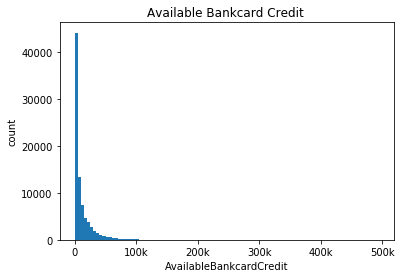

In [16]:
# plotting a histogram of the data in the "AvailableBankcardCredit" column

#setting the bins to range from 0 to the max value in the column, in steps of 5000
bins = np.arange(0, filtered_data['AvailableBankcardCredit'].max(), 5000)
plt.hist(data = filtered_data, x = 'AvailableBankcardCredit', bins = bins)
#abeling the x axis with intervals of 100,000 from 0 to 500,000
plt.xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, '100k', '200k', '300k', '400k', '500k'])
plt.title('Available Bankcard Credit ')
plt.xlabel('AvailableBankcardCredit')
#labeling the y axis with "count"
plt.ylabel('count');

Observation: The majority of AvailableBankcardCredit counts range from 0 to 100,000. It is obvious that a small percentage of people have more total bank credits than the majority of people.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We investigate the variables to better understand the borrower's APR. The majority of borrowers have AvailableBankcardCredit inside the 1000k range, according to the above AvailableBankcardCredit count plot. Due to their distance from the majority of the data points depicted in the figure, 113 borrowers with AvailableBankcardCreditares higher than 150k were excluded from the data.

>Additionally, two BorrowerAPR counts were greater than the rest of the numbers when looking at BorrowerAPR count. There may be valid reasons for using these two numbers given the high number counts that fall inside them. The two BorrowerAPR values are therefore left alone.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Right-skewed countplots are shown for ProsperScore Delinquencies, Last 7 Years, and Available Bankcard Credit. A normal distribution curve is followed by CreditScoreRangeUpper and CreditScoreRangeLower.

## Bivariate Exploration

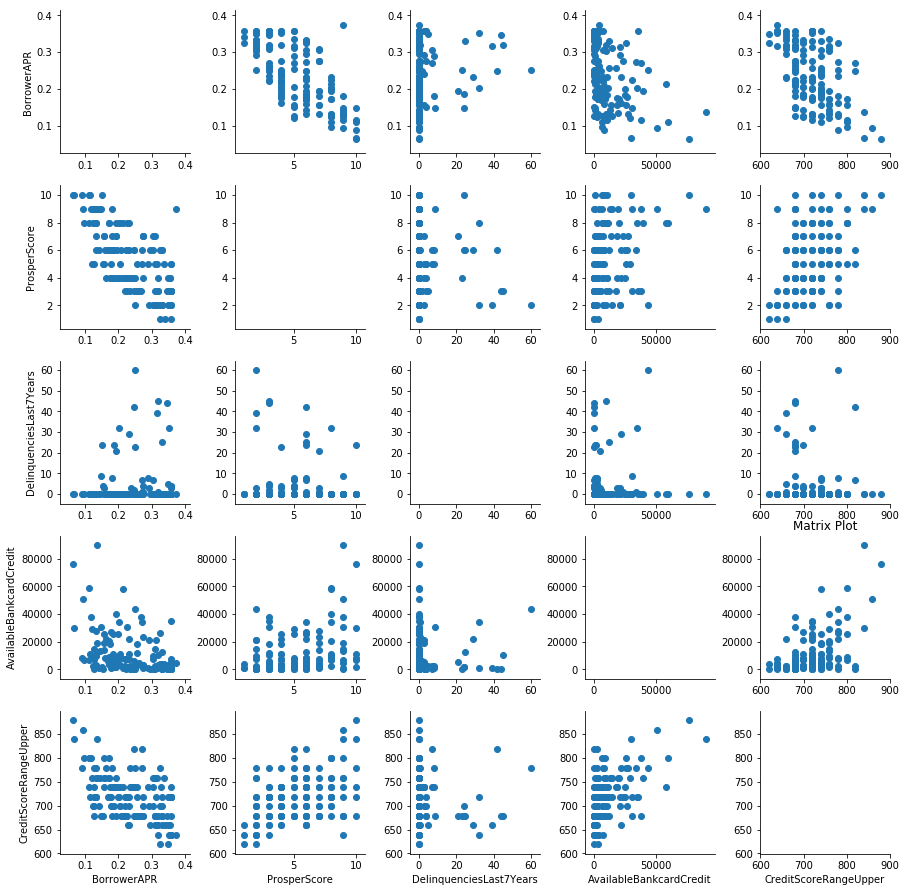

In [17]:
# plot matrix
import warnings
warnings.simplefilter("ignore")

#creating a matrix plot for five numeric variables in the dataset. 
num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
             'AvailableBankcardCredit', 'CreditScoreRangeUpper']

# 200 random samples are chosen from the dataset to create a smaller sample to plot. 
s = np.random.choice(filtered_data.shape[0], 200, replace=False)
loan_samp = filtered_data.loc[s,:]

## Creating a PairGrid object using the sample dataset, and generating a scatterplot
grid = sb.PairGrid(data = loan_samp, vars = num_vars)
grid.map_offdiag(plt.scatter)
#plot tile
plt.title('Matrix Plot');

Observation: We can establish which pair has a negative or positive association by examining the pattern in each scatter plot. Compared to other variables, ProsperScore appears to be more associated with BorrowerAPR. StatedMonthlyIncome will not be further examined because it provides no meaningful information on BorrowerAPR.

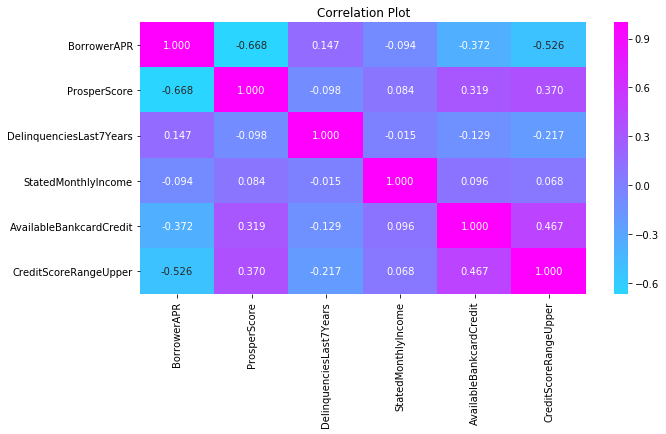

In [18]:
# correlation plot for a set of variables in the filtered_data datase

num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize = [10, 5])

#use the cmap and center arguments to set the color map and center the plot around 0, respectively. 
sb.heatmap(filtered_data[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'cool', center = 0)
plt.title('Correlation Plot') 
plt.show()

Observation: No pair of individuals exhibits a positive relationship. Given that a higher AvailableBankcardCredit has a better credit score, it makes logical. The relationship between BorrowerAPR and ProsperScore is unfavorable since borrowers with lower scores are more likely to have higher APRs. Similar to this, a better CreditScore indicates more reliable borrowers, which results in a reduced APR.

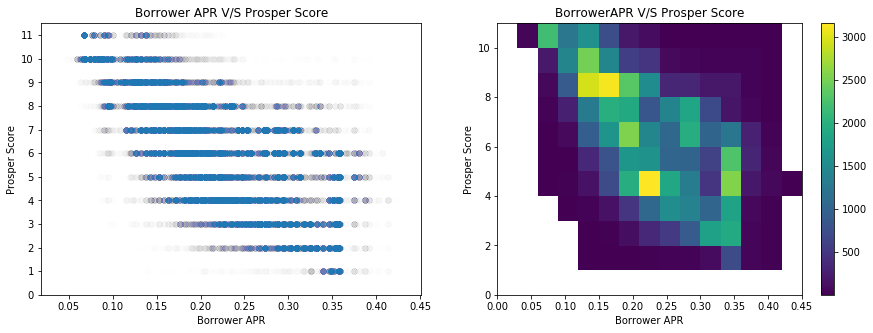

In [19]:
# scatter and heat plotting for comparing ProsperScore and BorrowerAPR. 

# first creating a figure with two subplots. 
plt.figure(figsize = [15, 5]) 

# first subplot, simply scatter plotting the data. 
plt.subplot(1, 2, 1)
plt.scatter(data = filtered_data, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)

# setting the limits for the y-axis. 
plt.yticks(np.arange(0, 12, 1))

# giving our subplot a title, x-axis label, and y-axis label. 
plt.title('Borrower APR V/S Prosper Score')
plt.xlabel('Borrower APR')
plt.ylabel('Prosper Score')


# second subplot, creating a heatmap. 
plt.subplot(1, 2, 2)

# creating bins for our x- and y-values. 
bins_x = np.arange(0, filtered_data['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, filtered_data['ProsperScore'].max()+1, 1)

# plotting our data as a heatmap. 
plt.hist2d(data = filtered_data, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
                cmin = 0.5)

# including a colorbar on the side of our plot. 
plt.colorbar()

# giving our subplot a title, x-axis label, and y-axis label. 
plt.title('BorrowerAPR V/S Prosper Score')
plt.xlabel('Borrower APR')
plt.ylabel('Prosper Score');

Observation: The visualization makes sense since those with better ratings are typically more trustworthy and are consequently granted lower BorrowerAPR

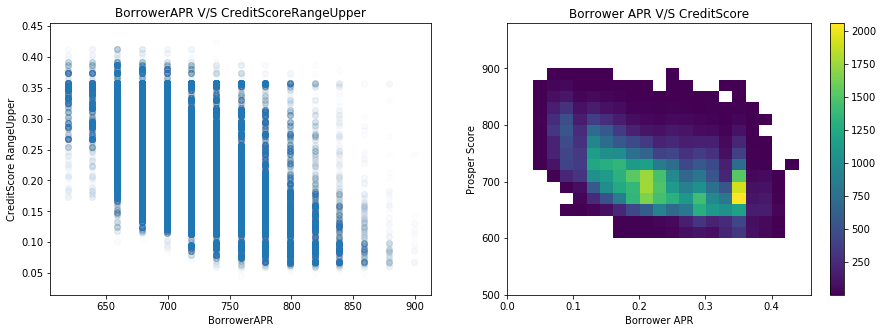

In [20]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
# Makes a scatterplot of CreditScoreRangeUpper vs BorrowerAPR
plt.scatter(data = filtered_data, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.01)
# Gives the plot a title
plt.title('BorrowerAPR V/S CreditScoreRangeUpper')
# Labels the x-axis as BorrowerAPR
plt.xlabel('BorrowerAPR')
# Labels the y-axis as CreditScoreRangeUpper
plt.ylabel('CreditScore RangeUpper');
 

plt.subplot(1, 2, 2)
# Makes the bins for the x-axis
bins_x = np.arange(0, filtered_data['BorrowerAPR'].max()+0.05, 0.02)
# Makes the bins for the y-axis
bins_y = np.arange(500, filtered_data['CreditScoreRangeUpper'].max()+100, 20)
# Makes a heat plot of BorrowerAPR vs CreditScoreRangeUpper using the bins created for the x and y axis
plt.hist2d(data = filtered_data, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', bins = [bins_x, bins_y], 
                cmin = 0.5)
# Adds a color bar to the plot
plt.colorbar()
# Gives the plot a title
plt.title('Borrower APR V/S CreditScore')
# Labels the x-axis as BorrowerAPR (l)
plt.xlabel('Borrower APR')
# Labels the y-axis as ProsperScore
plt.ylabel('Prosper Score');

Observation: Despite the fact that the plot is filled with points. The pattern that a higher CreditScore correlates with a lower APR % can still be seen with the aid of the alpha function. This point is made clearer by the heatmap for the same variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The matrix plots and correlations are quite useful for previewing all potential variables associated to the borrower APR that we might try to analyze. ProsperScore and BorrowerAPR have the strongest correlation of all the variables (negative correlated). Examining data points and statistics pertaining to our variables is aided by univariate exploration. Bivariate analysis can help us better comprehend the BorrowerAPR and provide the answers to our queries.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> AvailableBankcardCredit, CreditScoreRangeUpper, and CreditScoreRangeUpper all have positive correlations with ProsperScore but negative correlations with BorrwerAPR.

## Multivariate Exploration

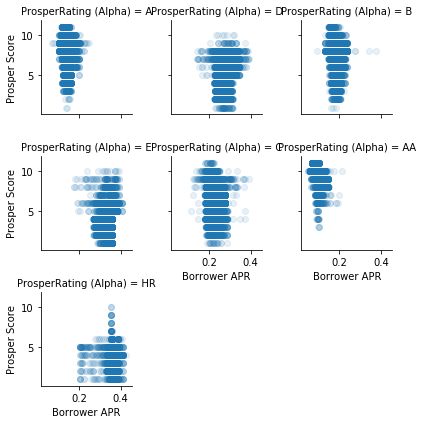

In [21]:
#using a seaborn FacetGrid to plot scatterplots of BorrowerAPR against ProsperScore for each ProsperRating. 
#The size and column wrapping parameters allow us to view all of the scatterplots on one plot. 
#The alpha parameter makes the individual points less visible so that we can more easily see patterns in the data.

grid = sb.FacetGrid(data = filtered_data, col = 'ProsperRating (Alpha)', col_wrap = 3, size = 2)
grid.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
# The set_xlabels() and set_ylabels() methods set the x-axis and y-axis labels for all the plots in the grid.
grid.set_xlabels('Borrower APR')
grid.set_ylabels('Prosper Score')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Multivariate Exploration can also include the correlation and matrix plots from earlier studies. These two plots can be completed earlier in the exploration process to preview all variables and how they interact with one another. This will be more effective. Additionally, FacetGrid displays the differences between each rating group's BorrowerAPR and ProsperScore.



### Were there any interesting or surprising interactions between features?

> Many variables are shown to be adversely connected to BorrowerAPR from all the aforementioned visualizations made from univariate to multivariate exploration, however ProspoerScore shows the biggest negative relationship.

## Conclusions
>The above dataset provides loan data from Prosper. The data includes information on loan status, loan amount, interest rate, and term. The data also includes information on the borrower's credit score, employment status, and annual income.

>Based on the above data, it appears that loans with higher interest rates are more likely to be delinquent. This is likely due to the fact that borrowers with higher interest rates are generally considered to be higher risk. Additionally, loans with shorter terms are also more likely to be delinquent. This is likely due to the fact that borrowers with shorter terms have less time to repay their loans.

>The above data also shows that loans with higher interest rates are more likely to be charged off. This is likely due to the fact that borrowers with higher interest rates are generally considered to be higher risk. Additionally, loans with shorter terms are also more likely to be charged off. This is likely due to the fact that borrowers with shorter terms have less time to repay their loans.

>Based on the above data, it is clear that loans with higher interest rates and shorter terms are more likely to be delinquent or charged off. Borrowers with higher interest rates are generally considered to be higher risk, and loans with shorter terms have less time to be repaid. Therefore, it is important for lenders to carefully consider the interest rate and term of a loan before extending credit to a borrower.


In [22]:
!jupyter nbconvert --to html /content/Part I_LoanDatafromProsper.ipynb

[NbConvertApp] WARNING | pattern '/content/Part' matched no files
[NbConvertApp] WARNING | pattern 'I_LoanDatafromProsper.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook wi